In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

from sklearn.model_selection import train_test_split


from hmmlearn import hmm

np.random.seed(46)

In [2]:
#Read EEG dataset
from os import listdir
# Z: normal but with eyes open
datapath_Z = 'dataset/EEG/Z' 
# O: normal but with eyes closed
datapath_O = 'dataset/EEG/O'
# S: ictal state and contains seizure activities
datapath_S = 'dataset/EEG/S'
# N: hippocampal formation of the opposite brain hemisphere
datapath_N = 'dataset/EEG/N'
# F: epileptogenic zone
datapath_F = 'dataset/EEG/F'

files_Z = [f for f in listdir(datapath_Z)]
files_O = [f for f in listdir(datapath_O)]
files_S = [f for f in listdir(datapath_S)]
files_N = [f for f in listdir(datapath_N)]
files_F = [f for f in listdir(datapath_F)]

Z_train, Z_test = train_test_split(
    files_Z, test_size = 0.3)

S_train, S_test = train_test_split(
    files_S, test_size = 0.3)

data_Z_train = np.loadtxt(datapath_Z + '/' + Z_train[0])
data_Z_train_len = [len(data_Z_train)]
for file in Z_train:
    data_file = np.loadtxt(datapath_Z + '/' + file)
    data_Z_train = np.concatenate([data_Z_train, data_file])
    data_Z_train_len.append(len(data_file))

data_Z_test = np.loadtxt(datapath_Z + '/' + Z_test[0])
data_Z_test_len = [len(data_Z_test)]
for file in Z_test:
    data_file = np.loadtxt(datapath_Z + '/' + file)
    data_Z_test = np.concatenate([data_Z_test, data_file])
    data_Z_test_len.append(len(data_file))
    
data_S_test = np.loadtxt(datapath_S + '/' + S_test[0])
data_S_test_len = [len(data_S_test)]
for file in S_test:
    data_file = np.loadtxt(datapath_S + '/' + file)
    data_S_test = np.concatenate([data_S_test, data_file])
    data_S_test_len.append(len(data_file))

#test_data = np.concatenate([data_Z_test, data_S_test])
#test_data_len = np.concatenate([data_Z_test_len, data_S_test_len])

In [3]:
#train hmm for EEG dataset 
EEG_HMM = hmm.GMMHMM(n_components=4, n_mix=10, covariance_type='diag')
EEG_HMM.fit(data_Z_train.reshape(-1,1), lengths = data_Z_train_len)

GMMHMM(algorithm='viterbi', covariance_type='diag',
       covars_prior=array([[[-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5]],

       [[-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5]],

       [[-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5]],

       [[-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5],...
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
       min_covar=0.001, n_components=4, n_iter=10, n_mix=10, params='stmcw',
       random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
       verbose=False,
       weights_prio

In [4]:
score_Z = []
score_S = []
for i in range(len(Z_test)):
    data = data_Z_test[i*data_Z_test_len[i]:(i + 1)*data_Z_test_len[i]]
    score_Z.append(EEG_HMM.score(data.reshape(-1, 1)))
    # print(EGG_HMM.score(data.reshape(-1, 1)))
#print("---------------")
for i in range(len(S_test)):
    data = data_S_test[i*data_S_test_len[i]:(i + 1)*data_S_test_len[i]]
    score_S.append(EEG_HMM.score(data.reshape(-1, 1)))
    # print(EGG_HMM.score(data.reshape(-1, 1)))

<function matplotlib.pyplot.show(*args, **kw)>

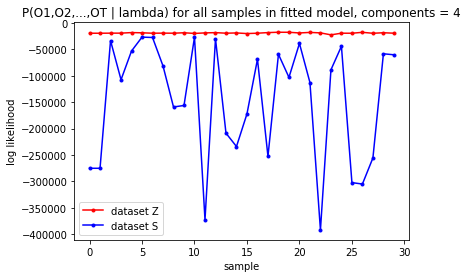

In [5]:
plt.plot(score_Z[:], ".-", label="dataset Z", color = 'r')
plt.plot(score_S[:], ".-", label="dataset S", color = 'b')
plt.xlabel("sample")
plt.ylabel("log likelihood")
#plt.yscale("symlog")
plt.title("P(O1,O2,...,OT | lambda) for all samples in fitted model, components = 4")
plt.legend()
plt.show

In [6]:
# Read ECG dataset
# take normal sinus rhythm (NSR) and Atrial fibrillation (AFib) as example
from os import listdir
datapath_NSR = 'dataset/MLII/1 NSR' 
datapath_AFib = 'dataset/MLII/4 AFIB'

files_NSR = [f for f in listdir(datapath_NSR)]
files_AFib = [f for f in listdir(datapath_AFib)]

NSR_train, NSR_test = train_test_split(
    files_NSR, test_size = 0.3)

AFib_train, AFib_test = train_test_split(
    files_AFib, test_size = 0.3)

data_NSR_train = sio.loadmat(datapath_NSR + '/' + NSR_train[0])['val'][0]
data_NSR_train_len = [len(data_NSR_train)]

for file in NSR_train:
    data_file = sio.loadmat(datapath_NSR + '/' + file)['val'][0]
    data_NSR_train = np.concatenate([data_NSR_train, data_file])
    data_NSR_train_len.append(len(data_file))

data_NSR_test = sio.loadmat(datapath_NSR + '/' + NSR_test[0])['val'][0]
data_NSR_test_len = [len(data_NSR_test)]
for file in NSR_test:
    data_file = sio.loadmat(datapath_NSR + '/' + file)['val'][0]
    data_NSR_test = np.concatenate([data_NSR_test, data_file])
    data_NSR_test_len.append(len(data_file))
    
data_AFib_test = sio.loadmat(datapath_AFib + '/' + AFib_test[0])['val'][0]
data_AFib_test_len = [len(data_AFib_test)]
for file in AFib_test:
    data_file = sio.loadmat(datapath_AFib + '/' + file)['val'][0]
    data_AFib_test = np.concatenate([data_AFib_test, data_file])
    data_AFib_test_len.append(len(data_file))

#test_data = np.concatenate([data_NSR_test, data_AFib_test])
#test_data_len = np.concatenate([data_NSR_test_len, data_AFib_test_len])

In [7]:
#train hmm for ECG dataset 
ECG_HMM = hmm.GMMHMM(n_components=4, n_mix=10, covariance_type='diag')
ECG_HMM.fit(data_NSR_train.reshape(-1,1), lengths = data_NSR_train_len)

GMMHMM(algorithm='viterbi', covariance_type='diag',
       covars_prior=array([[[-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5]],

       [[-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5]],

       [[-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5]],

       [[-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5],...
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
       min_covar=0.001, n_components=4, n_iter=10, n_mix=10, params='stmcw',
       random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
       verbose=False,
       weights_prio

In [8]:
score_NSR = []
score_AFib = []
for i in range(len(NSR_test)):
    data = data_NSR_test[i*data_NSR_test_len[i]:(i + 1)*data_NSR_test_len[i]]
    score_NSR.append(ECG_HMM.score(data.reshape(-1, 1)))
    print(ECG_HMM.score(data.reshape(-1, 1)))
print("---------------")
for i in range(len(AFib_test)):
    data = data_AFib_test[i*data_AFib_test_len[i]:(i + 1)*data_AFib_test_len[i]]
    score_AFib.append(ECG_HMM.score(data.reshape(-1, 1)))
    print(ECG_HMM.score(data.reshape(-1, 1)))

-15366.076203520595
-15366.076203520595
-15341.50836753884
-19933.9685158668
-18111.392473889904
-15287.356539545399
-16379.262207745052
-21750.54954256891
-22117.91252498259
-17302.70757079341
-17192.780506803814
-16784.25289270533
-15057.746653480912
-15418.53474544674
-14959.94645950697
-14933.13273607629
-17516.99590776892
-16139.164651959296
-15378.419228388524
-15787.067151858862
-16031.607483871929
-16618.869694307636
-15823.30656953377
-17454.15490098235
-16584.585730300652
-15054.600143088262
-18507.091630268427
-15803.23489805669
-15600.91148573684
-15654.418368444201
-16531.544126853874
-15522.44499217253
-17057.224839407067
-15737.808053281191
-16738.562131817358
-16106.139650568803
-16019.203199823165
-16692.972655055702
-15569.120915109499
-15248.623453305723
-17087.657503743067
-17949.405768223824
-16258.014751439738
-16480.95568183064
-15373.893715173986
-16929.32314654216
-17617.889313986463
-16092.406299681916
-16429.70075193447
-17351.930451249493
-17164.724467193795

<function matplotlib.pyplot.show(*args, **kw)>

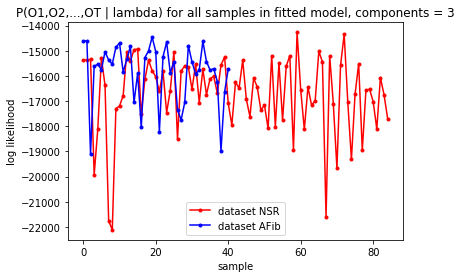

In [9]:
plt.plot(score_NSR[:], ".-", label="dataset NSR", color = 'r')
plt.plot(score_AFib[:], ".-", label="dataset AFib", color = 'b')
plt.xlabel("sample")
plt.ylabel("log likelihood")
#plt.yscale("symlog")
plt.title("P(O1,O2,...,OT | lambda) for all samples in fitted model, components = 3")
plt.legend()
plt.show